In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:

car_df = pd.read_csv('Car.csv')
car_df.head()

,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,sales
0,21.50,1.8,140.0,28.0,16.919
1,28.40,3.2,225.0,25.0,39.384
2,NaN,3.2,225.0,26.0,14.114
3,42.00,3.5,210.0,22.0,8.588
4,23.99,1.8,150.0,27.0,20.397


In [4]:

range_df = pd.read_csv('range.csv')

range_df.head()


,GasolineVehicles,hybrid cars,All-ElectricVehicles,Unnamed: 3,Unnamed: 4,Unnamed: 5
Minimum,240.0,150.0,62.0,NaN,NaN,NaN
Median,412.0,440.0,83.5,NaN,NaN,NaN
Maximum,703.0,600.0,294.0,NaN,NaN,NaN


In [5]:

electric_df = pd.read_csv('state_year_totals_electrci.csv')

electric_df.head()


,State,Year,Total Vehicles
0,AK,2017,594
1,AK,2018,541
2,AK,2019,1009
3,AK,2020,1851
4,AK,2021,3137


In [6]:

car_df_cleaned = car_df.dropna()

X_car = car_df_cleaned.drop('sales', axis=1)
y_car = car_df_cleaned['sales']

X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.2, random_state=42)

# Splitting the state_year_totals_electric.csv into training and test sets

X_electric = electric_df[['State', 'Year']]
y_electric = electric_df['Total Vehicles']

# Converting 'State' to numeric values using get_dummies for modeling purposes
X_electric_encoded = pd.get_dummies(X_electric, columns=['State'])

# Splitting into training and test sets (80/20 split)
X_electric_train, X_electric_test, y_electric_train, y_electric_test = train_test_split(X_electric_encoded, y_electric, test_size=0.2, random_state=42)

# Checking the sizes of the splits to ensure they've been executed correctly
(X_car_train.shape, X_car_test.shape, y_car_train.shape, y_car_test.shape), (X_electric_train.shape, X_electric_test.shape, y_electric_train.shape, y_electric_test.shape)


(((122, 4), (31, 4), (122,), (31,)), ((244, 51), (61, 51), (244,), (61,)))

In [7]:
# Determine the 75th percentile for fuel efficiency in the Car.csv dataset
fuel_efficiency_75th_percentile = car_df_cleaned['Fuel_efficiency'].quantile(0.75)

# Median range values from range.csv
median_gasoline_range = range_df.loc['Median', 'GasolineVehicles']
median_hybrid_range = range_df.loc['Median', 'hybrid cars']
median_electric_range = range_df.loc['Median', 'All-ElectricVehicles']

# Function to categorize cars and apply median range estimates
def estimate_range(fuel_efficiency):
    if fuel_efficiency > fuel_efficiency_75th_percentile:
      
        return max(median_hybrid_range, median_electric_range)
    else:
        return median_gasoline_range

# Apply the function to estimate the range for each car in the Car.csv dataset
car_df_cleaned['Estimated_Range'] = car_df_cleaned['Fuel_efficiency'].apply(estimate_range)

car_df_cleaned.head()


/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/2484233776.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Estimated_Range'] = car_df_cleaned['Fuel_efficiency'].apply(estimate_range)


,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,sales,Estimated_Range
0,21.50,1.8,140.0,28.0,16.919,440.0
1,28.40,3.2,225.0,25.0,39.384,412.0
3,42.00,3.5,210.0,22.0,8.588,412.0
4,23.99,1.8,150.0,27.0,20.397,440.0
5,33.95,2.8,200.0,22.0,18.780,412.0


In [8]:


# Categorizing the 'Estimated_Range' into 'High' and 'Low'
median_range = car_df_cleaned['Estimated_Range'].median()
car_df_cleaned['Range_Category'] = car_df_cleaned['Estimated_Range'].apply(lambda x: 'High' if x >= median_range else 'Low')

# Splitting the categorized dataset into features and target variable
X = car_df_cleaned[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency']]
y = car_df_cleaned['Range_Category']

# Splitting into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result


/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/3773383624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Range_Category'] = car_df_cleaned['Estimated_Range'].apply(lambda x: 'High' if x >= median_range else 'Low')


(1.0,
 '              precision    recall  f1-score   support\n\n        High       1.00      1.00      1.00        31\n\n    accuracy                           1.00        31\n   macro avg       1.00      1.00      1.00        31\nweighted avg       1.00      1.00      1.00        31\n')

In [9]:

car_df_cleaned['Power_to_Weight_Ratio'] = car_df_cleaned['Horsepower'] / car_df_cleaned['Engine_size']
price_bins = pd.qcut(car_df_cleaned['Price_in_thousands'], q=4, labels=False)
car_df_cleaned['Price_Bracket'] = price_bins
X_fe = car_df_cleaned[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_to_Weight_Ratio', 'Price_Bracket']]
y_fe = car_df_cleaned['Range_Category']
gnb_cv = GaussianNB()
cv_scores = cross_val_score(gnb_cv, X_fe, y_fe, cv=5, scoring='accuracy')
cv_scores_mean = np.mean(cv_scores)
cv_scores_std = np.std(cv_scores)
cv_scores_mean, cv_scores_std

/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/1228367862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Power_to_Weight_Ratio'] = car_df_cleaned['Horsepower'] / car_df_cleaned['Engine_size']
/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/1228367862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Price_Bracket'] = price_bins


(1.0, 0.0)

In [10]:
car_df_cleaned['Power_to_Weight_Ratio'] = car_df_cleaned['Horsepower'] / car_df_cleaned['Engine_size']
car_df_cleaned['Price_Bracket'] = pd.qcut(car_df_cleaned['Price_in_thousands'], q=4, labels=False)
X_updated = car_df_cleaned[['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_to_Weight_Ratio', 'Price_Bracket']]
y_updated = car_df_cleaned['Range_Category']
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

gnb_final = GaussianNB()
gnb_final.fit(X_train_updated, y_train_updated)

y_pred_final_updated = gnb_final.predict(X_test_updated)

conf_matrix_updated = confusion_matrix(y_test_updated, y_pred_final_updated)

accuracy_final_updated = accuracy_score(y_test_updated, y_pred_final_updated)
precision_final_updated = precision_score(y_test_updated, y_pred_final_updated, pos_label='High')
recall_final_updated = recall_score(y_test_updated, y_pred_final_updated, pos_label='High')
f1_final_updated = f1_score(y_test_updated, y_pred_final_updated, pos_label='High')

(conf_matrix_updated, accuracy_final_updated, precision_final_updated, recall_final_updated, f1_final_updated)


/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/4092278993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Power_to_Weight_Ratio'] = car_df_cleaned['Horsepower'] / car_df_cleaned['Engine_size']
/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/4092278993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['Price_Bracket'] = pd.qcut(car_df_cleaned['Price_in_thousands'], q=4, labels=False)


(array([[31]]), 1.0, 1.0, 1.0, 1.0)

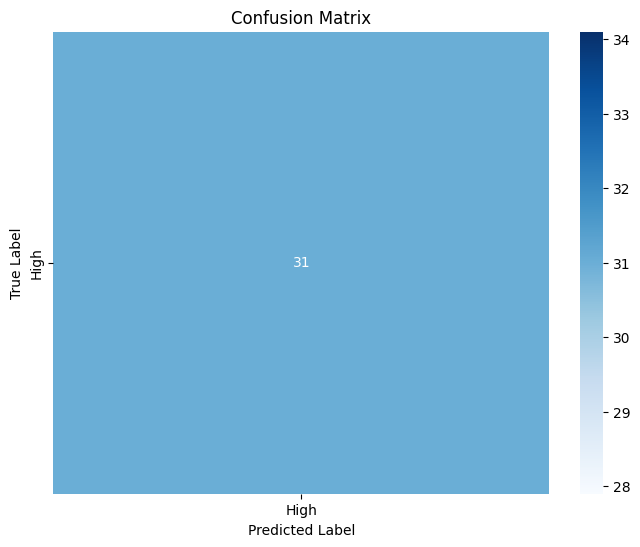

/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_65752/3075281041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


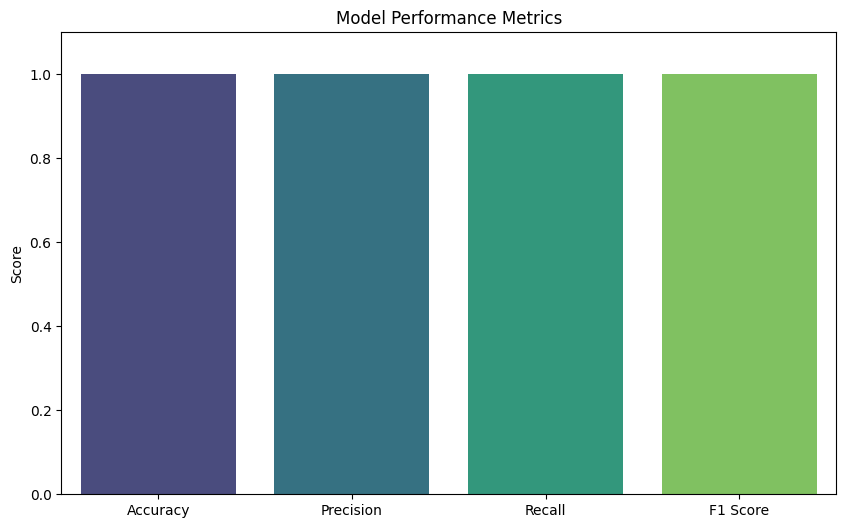

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_updated, annot=True, fmt='d', cmap='Blues', xticklabels=['High'], yticklabels=['High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_final_updated, precision_final_updated, recall_final_updated, f1_final_updated]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


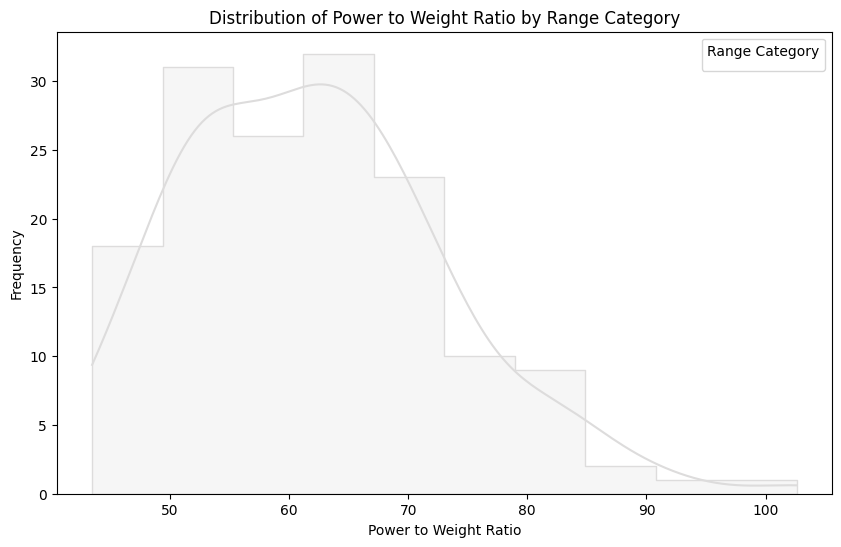

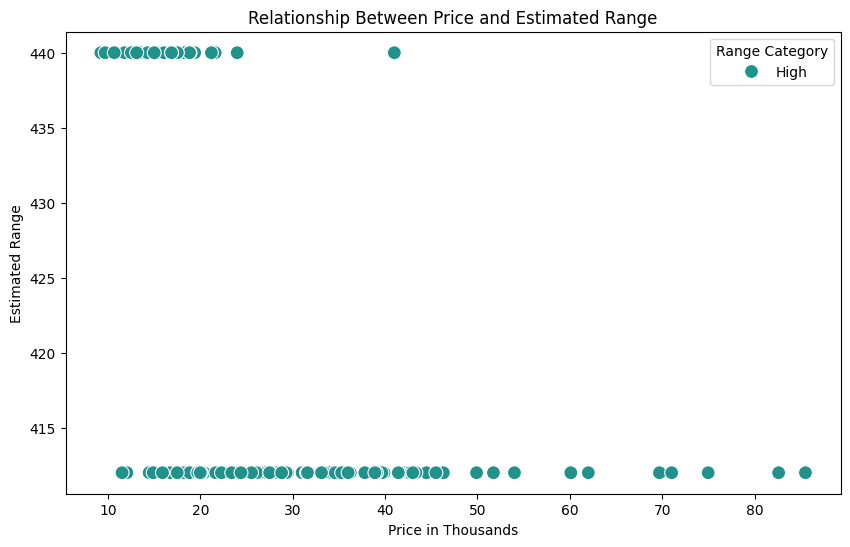

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=car_df_cleaned, x='Power_to_Weight_Ratio', hue='Range_Category', kde=True, element='step', palette='coolwarm')
plt.title('Distribution of Power to Weight Ratio by Range Category')
plt.xlabel('Power to Weight Ratio')
plt.ylabel('Frequency')
plt.legend(title='Range Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_df_cleaned, x='Price_in_thousands', y='Estimated_Range', hue='Range_Category', style='Range_Category', palette='viridis', s=100)
plt.title('Relationship Between Price and Estimated Range')
plt.xlabel('Price in Thousands')
plt.ylabel('Estimated Range')
plt.legend(title='Range Category')
plt.show()

